In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = f'{model_name_list[0].lower()}' # ArrayList: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


['100', '99', '98', '97', '96', '95', '94', '93', '92', '91', '90', '89', '88', '87', '86', '85', '84', '83', '82', '81', '80', '79', '78', '77', '76', '75', '74', '73', '72', '71', '70', '69', '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58', '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47', '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36', '35', '34', '33', '32', '31', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model array: 19 of 101 = 18.81188118811881%
mutation score for rand_loop in model array: 25 of 101 = 24.752475247524753%
mutation score for bes_no_loop in model array: 19 of 101 = 18.81188118811881%
mutation score for rand_no_loop in model array: 25 of 101 = 24.752475247524753%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 25,
    'fig_hight' : 5,
    'x_lim' : 50,
    'y_lim' : 80,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name}",
    
    'bes_l_label': 'bes_loops',
    'random_l_label': 'random_loops',
    'bes_no_l_label': 'bes_no_self_loops',
    'random_no_l_label': 'random_no_self_loops' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown"
    
    
}




all_common_mutants: ['2', '5', '16', '19', '30', '32', '34', '37', '59', '70', '73', '74', '75', '76', '77', '80', '81', '88', '100']
labels: ['2', '5', '16', '19', '30', '32', '34', '37', '59', '70', '73', '74', '75', '77', '80', '88', '100']
bes_l data: [19, 3, 6, 6, 3, 3, 6, 6, 2, 6, 6, 9, 8, 65, 7, 1, 80]
rand_l data: [1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1]
bes_no_l data: [18, 2, 6, 6, 2, 2, 6, 6, 2, 6, 6, 9, 8, 8, 7, 1, 80]
rand_no_l data: [1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1]


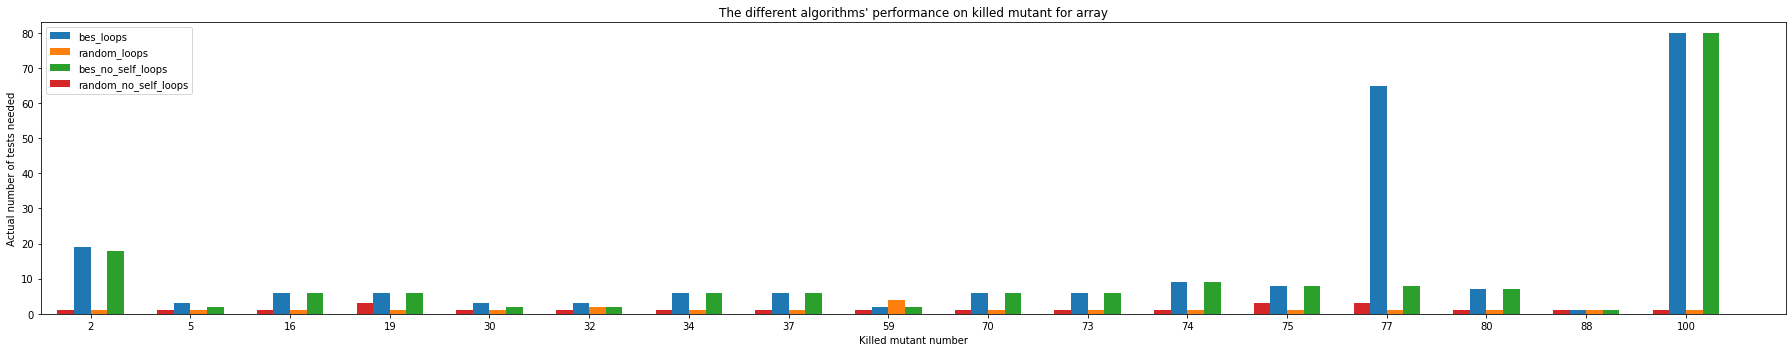

In [5]:

#################################
## Manually:
#################################

# actual_size

desired_mutants = m_lists[0]    #[0:6]
print(f'all_common_mutants: {desired_mutants}')

y = [ x for x in desired_mutants if x not in ['76', '81'] ]
desired_mutants = y


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria

d_map['x_lim'] = 51
d_map['y_lim'] = 83

plot_4_bars(labels, c_lists, d_map)


labels: ['2', '5', '16', '19', '30', '32', '34', '37', '59', '70', '73', '74', '75', '76', '77', '80', '81', '88', '100']
bes_l data: [1.505242109298706, 0.8613529205322266, 0.973402738571167, 0.8802599906921387, 0.9018759727478028, 0.664208173751831, 0.7182862758636475, 0.9298880100250244, 0.8283591270446777, 1.6781880855560305, 1.2655670642852783, 1.2171180248260498, 0.9016349315643309, 3.4507257938385014, 1.8978030681610107, 1.4740569591522217, 4.2161951065063485, 1.2322921752929688, 1.8405160903930664]
rand_l data: [1.558959722518921, 1.5552656650543213, 1.5778968334197998, 1.6009531021118164, 1.7589778900146484, 1.4431710243225098, 1.6898908615112305, 1.8155059814453125, 1.7226822376251218, 1.5283150672912598, 1.4311871528625488, 1.4332869052886963, 1.7949209213256836, 1.6772599220275881, 1.781955003738403, 1.7827050685882568, 1.8425769805908203, 1.47670316696167, 1.711005926132202]
bes_no_l data: [1.6481258869171145, 1.5558631420135498, 1.4669368267059326, 1.7151477336883545, 1.5

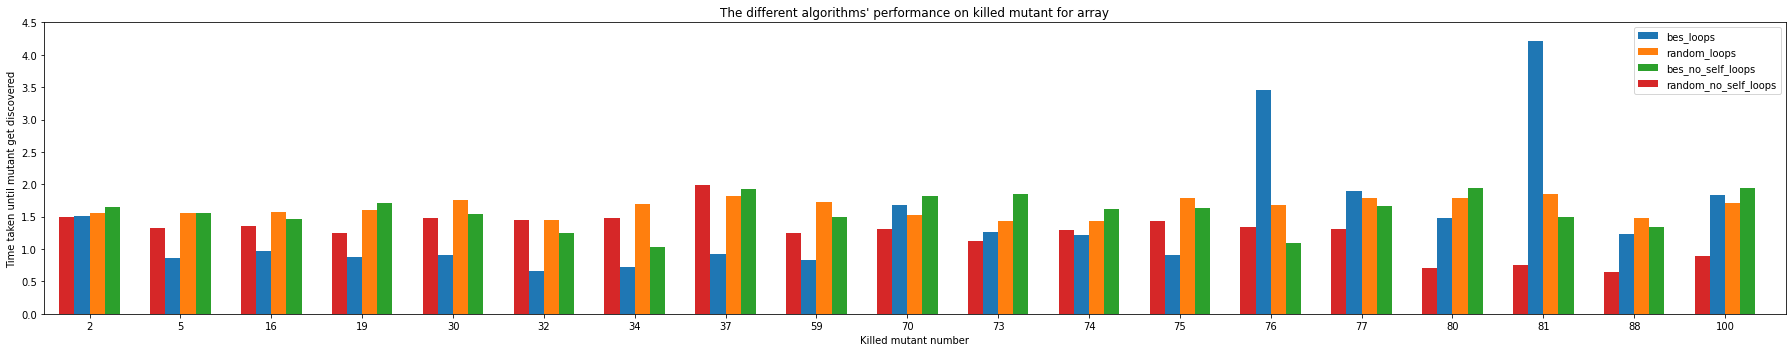

In [6]:
# time_requierd

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
d_map['x_lim'] = 56
d_map['y_lim'] = 4.5

plot_4_bars(labels, c_lists, d_map)



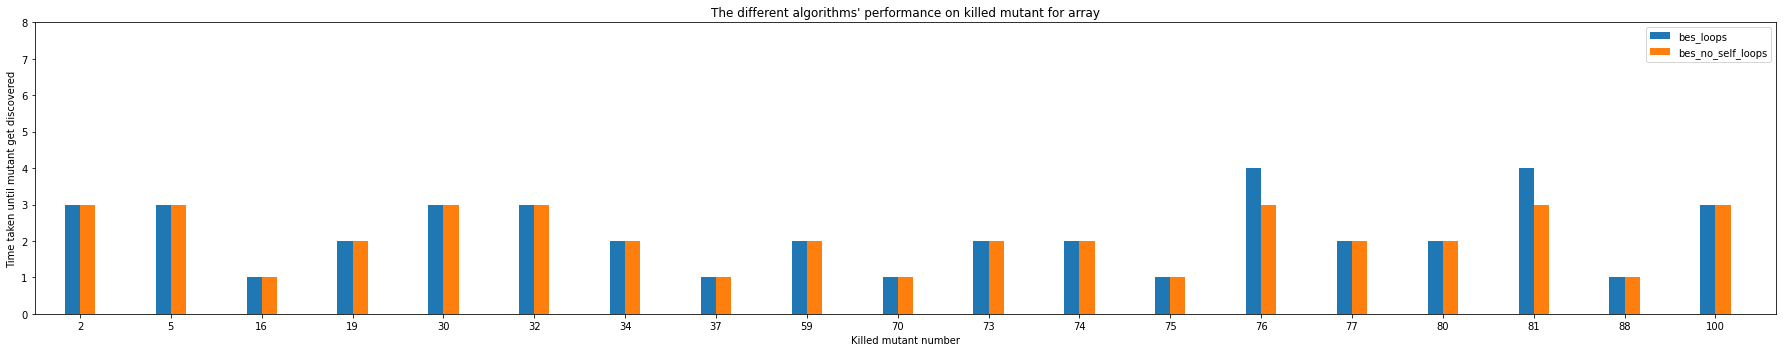

In [7]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0)
(bes_lo_c, bes_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' = 25
d_map['y_lim'] = 8


plot_2_bars(labels, c_lists, d_map)

